### Import Data Analysis Libraries

In [11]:
import pandas as pd
import numpy as np

### Import Visualization Libraries

In [119]:
!pip install XGBoost

You should consider upgrading via the 'c:\Users\Vaipoj Mesombat\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [120]:
!pip install missingno

You should consider upgrading via the 'c:\Users\Vaipoj Mesombat\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [121]:
!pip install imblearn

You should consider upgrading via the 'c:\Users\Vaipoj Mesombat\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [122]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE  # Helps visualize higher dimensions data
import missingno as msno # Missing Data visualization
import seaborn as sns
sns.set(style="white")
%matplotlib inline

In [16]:
from sklearn.preprocessing import StandardScaler, normalize  # Helps us in Standardizing the data
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, average_precision_score # Evaluation
                                                                                                             # metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.cluster import KMeans # Clustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE # Oversampling

In [17]:
import time
from datetime import datetime
import warnings
import warnings; warnings.simplefilter('ignore')

In [18]:
df = pd.read_csv('train.csv')
df.set_index('ID', inplace = True)

In [19]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
ID,,,,,,,,,,,,,,,,,,,,,
1,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
2,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
3,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,...,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
4,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,...,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
5,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,...,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


In [21]:
print (df.shape)
print (df['target'].value_counts())

(36553, 65)
0    34788
1     1765
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

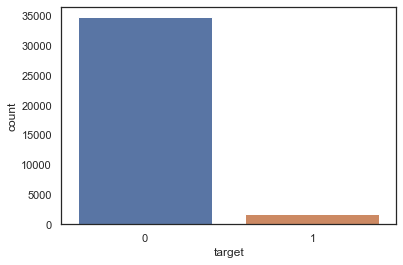

In [22]:
sns.countplot(x='target', data=df)

Sumamry - Data is higly imbalance Data

In [23]:
X_df = df.drop('target', axis = 1)
Y_df = df['target']

### Missing Values Imputation

<AxesSubplot:>

<Figure size 1152x432 with 0 Axes>

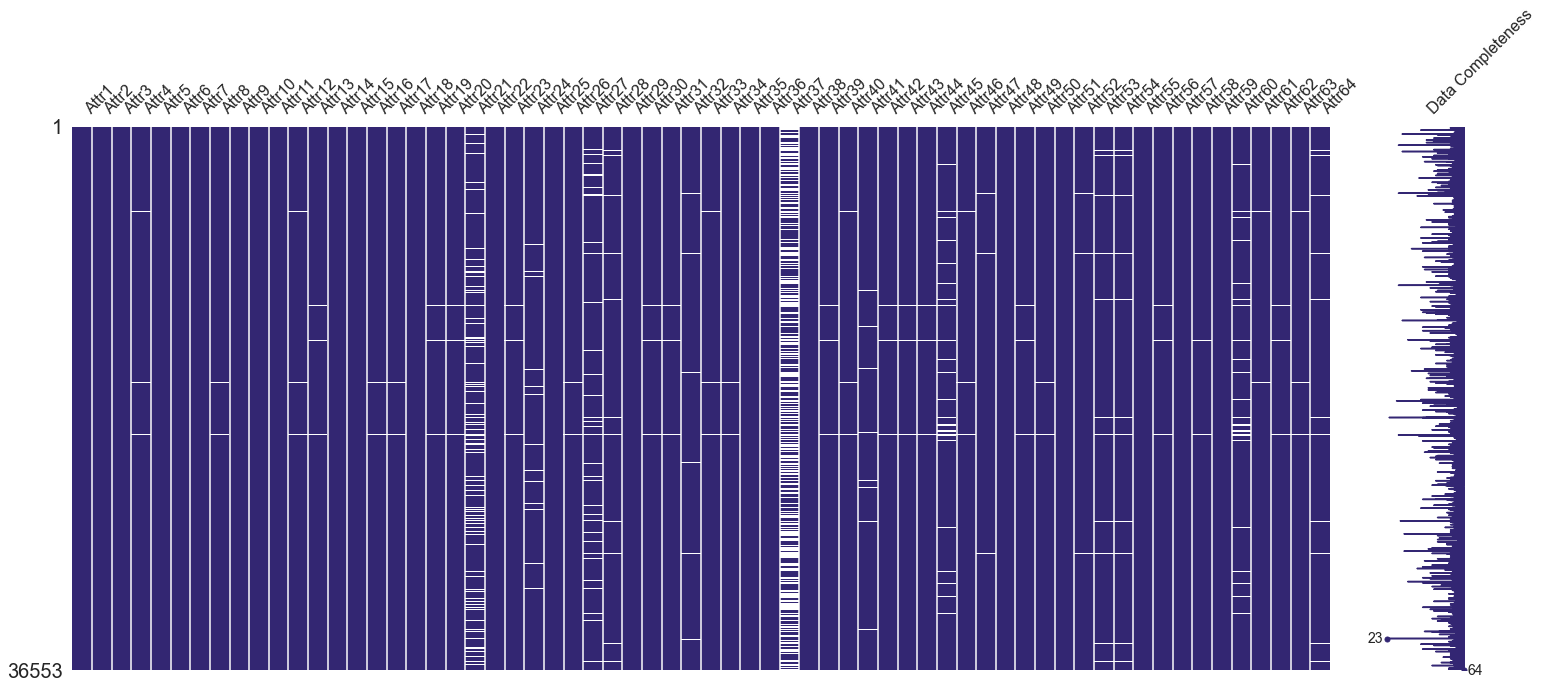

In [24]:
plt.figure(figsize=(16,6))
msno.matrix(X_df,labels = True, color=(0.20,0.15,0.45))

#### verify data

In [25]:
X_df.isnull().sum().sum()

35187

Manage the missing value:
1.   Replace zero & null value with NaN (Non a Number)
2.   Replace NaN with median

In [26]:
X_df = X_df.replace({0:np.nan})

In [27]:
X_df.isnull().sum().sum()

84376

In [28]:
X_df = X_df.fillna(X_df.median()) 

In [29]:
X_df.isnull().sum().sum()

0

<AxesSubplot:>

<Figure size 1152x432 with 0 Axes>

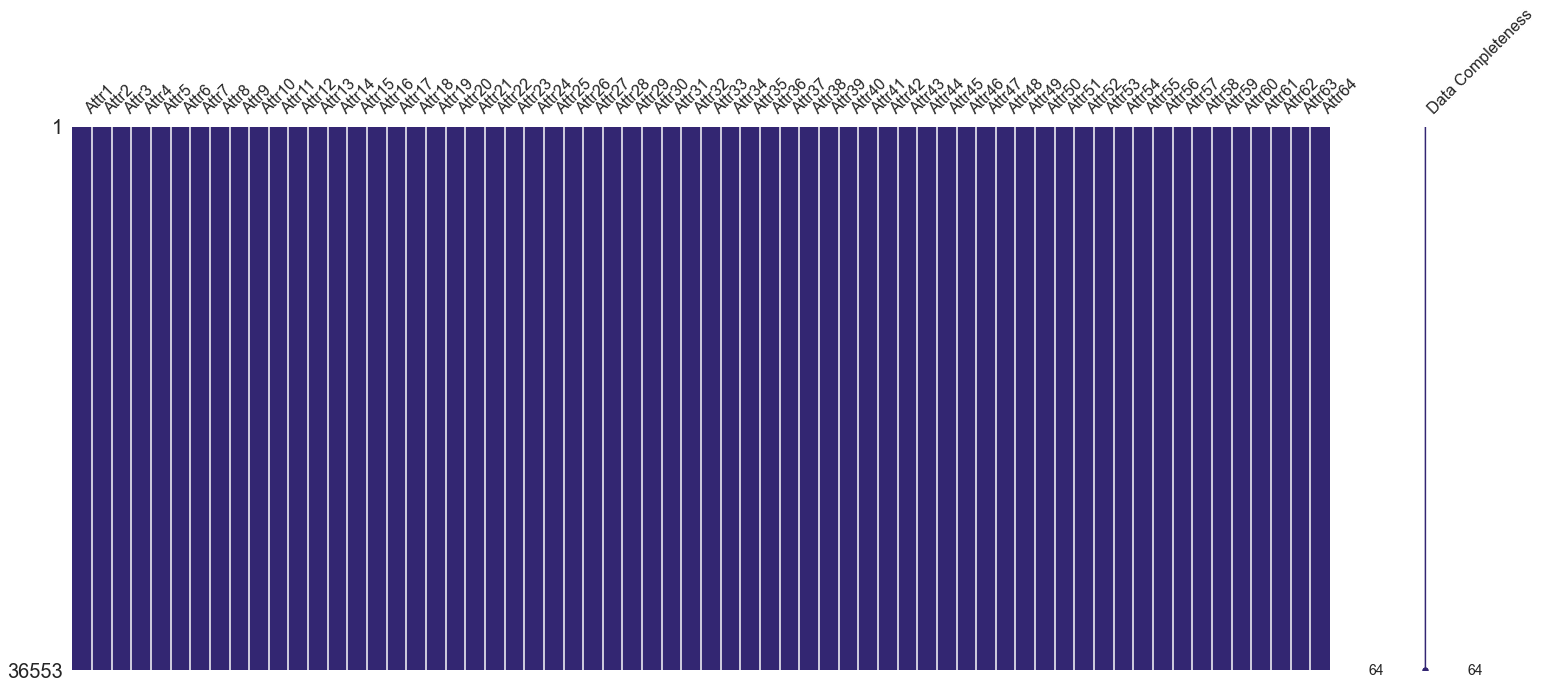

In [30]:
#Recheck missing values after Imputation
plt.figure(figsize=(16,6))
msno.matrix(X_df,labels = True, color=(0.20,0.15,0.45))

### Lets draw heatmap to check multi collinearity

C:\Users\VAIPOJ~1\AppData\Local\Temp/ipykernel_4496/2754453641.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

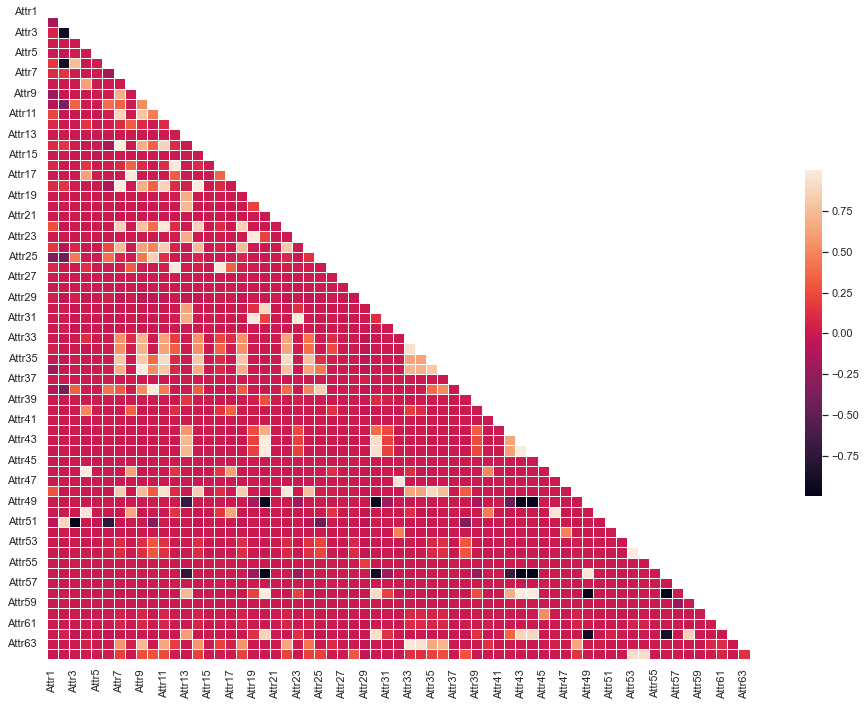

In [31]:
fig, ax = plt.subplots(figsize=(16,12)) 
corr = X_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

 
sns.heatmap(corr, mask=mask,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
# A condition to filter all the columns where collinearity with other columns is greater than 0.2 and less than 1.0
high_corr_attr = corr[(corr>0.2) & (corr<1)].count().sort_values(ascending= False)

In [33]:
#There are  31 columns which has correlation of more than 0.2
cols_to_be_dropped = list(high_corr_attr[high_corr_attr > 5].index)

In [34]:
len(cols_to_be_dropped)

31

In [35]:
X_df.drop(cols_to_be_dropped, axis = 1, inplace= True) # Dropping columns

In [36]:
X_df.shape

(36553, 33)

C:\Users\VAIPOJ~1\AppData\Local\Temp/ipykernel_4496/3378564783.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 [Text(0.5, 0, 'Attr1'),
  Text(1.5, 0, 'Attr2'),
  Text(2.5, 0, 'Attr3'),
  Text(3.5, 0, 'Attr4'),
  Text(4.5, 0, 'Attr5'),
  Text(5.5, 0, 'Attr6'),
  Text(6.5, 0, 'Attr12'),
  Text(7.5, 0, 'Attr15'),
  Text(8.5, 0, 'Attr21'),
  Text(9.5, 0, 'Attr26'),
  Text(10.5, 0, 'Attr27'),
  Text(11.5, 0, 'Attr28'),
  Text(12.5, 0, 'Attr29'),
  Text(13.5, 0, 'Attr32'),
  Text(14.5, 0, 'Attr37'),
  Text(15.5, 0, 'Attr39'),
  Text(16.5, 0, 'Attr40'),
  Text(17.5, 0, 'Attr41'),
  Text(18.5, 0, 'Attr45'),
  Text(19.5, 0, 'Attr46'),
  Text(20.5, 0, 'Attr47'),
  Text(21.5, 0, 'Attr49'),
  Text(22.5, 0, 'Attr50'),
  Text(23.5, 0, 'Attr51'),
  Text(24.5, 0, 'Attr52'),
  Text(25.5, 0, 'Attr53'),
  Text(26.5, 0, 'Attr54'),
  Text(27.5, 0, 'Attr55'),
  Text(28.5, 0, 'Attr56'),
  Text(29

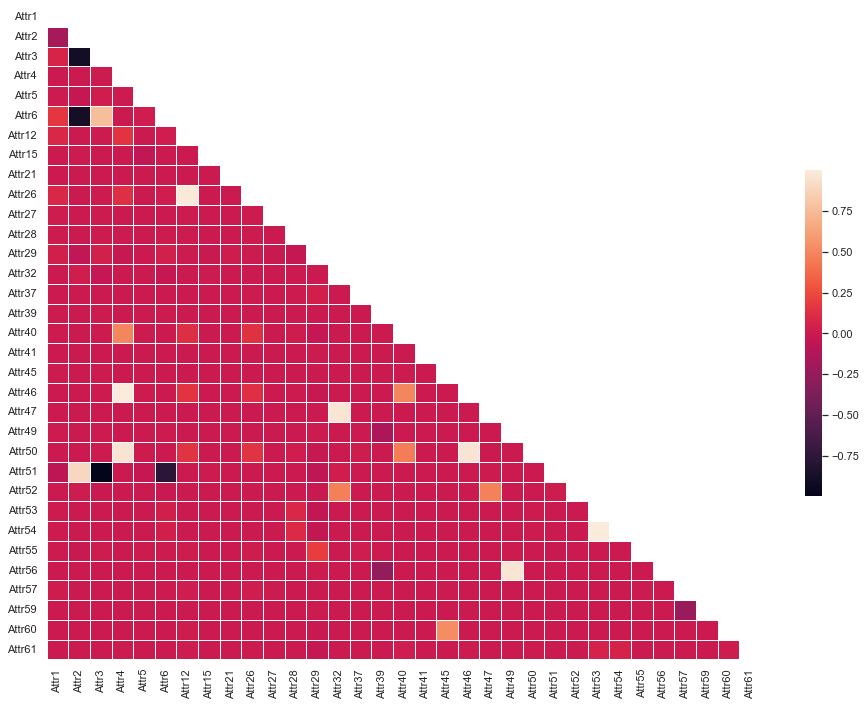

In [37]:
# Lets check the heatmap again
fig, ax = plt.subplots(figsize=(16,12)) 
corr = X_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

 
sns.heatmap(corr, mask=mask,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)

In [38]:
X_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr12,Attr15,Attr21,Attr26,...,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr59,Attr60,Attr61
ID,,,,,,,,,,,,,,,,,,,,,
1,0.135370,0.45185,0.31162,2.0469,10.2340,0.167680,0.56316,819.60,1.04560,0.373930,...,0.297670,0.14326,1.40290,1.66060,1189.700,0.078728,0.24695,0.18362,9.0895,8.8342
2,0.005861,0.39858,0.19768,1.9390,9.5771,0.044573,0.03438,4087.60,0.97850,0.085842,...,0.210510,0.27083,1.01620,1.33400,1.939,0.269720,0.12332,0.31271,6.2213,4.2785
3,0.110600,0.16117,0.47894,7.5711,263.9000,0.044573,1.89830,363.85,1.83520,0.830940,...,0.072886,0.12675,1.87160,2.06320,6092.300,0.159870,0.13185,0.10234,9.4499,3.3443
4,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.714200,0.12581,5433.40,0.44909,0.056405,...,0.628480,0.19822,-0.69738,0.46946,-13606.000,-0.015327,-0.13730,-1.67320,29.2710,14.1410
5,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.200070,0.51117,675.35,1.06000,0.540110,...,0.258050,0.13579,1.12950,2.46710,75.681,0.110170,0.38764,1.18420,4.5462,15.1400


Their seems a lot of outliers which spans even 50-60 Standard Deviations from the mean. However removing outliers is sometimes not a good idea unless one has Domain expertise

#### Lets try clustering and see if we can get any insigt from that. We shall use Kmeans Clustering 

#### Lets work towards elbow method to determine optimum number of clusters

In [39]:
variance = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(X_df.values)
    variance.append(km.inertia_)


#### Lets plot Elbow

Text(0.5, 1.0, 'Elbow')

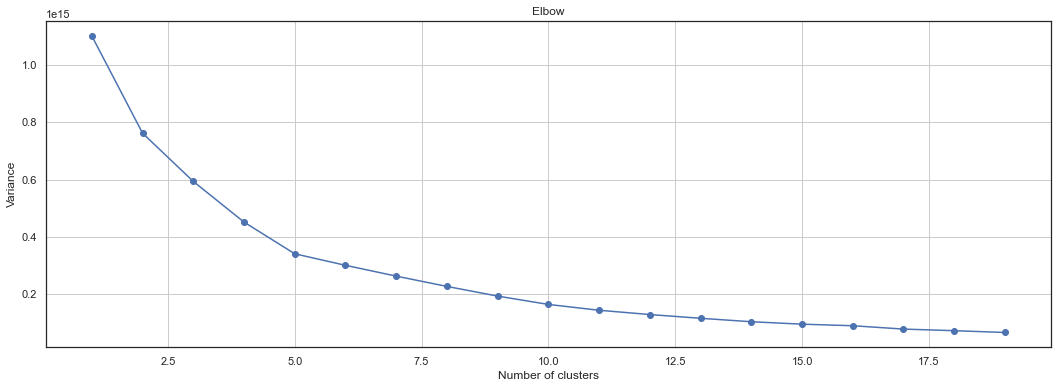

In [40]:
plt.figure(figsize = (18,6))
plt.plot(range(1, 20), variance, marker='o')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.title('Elbow')

Summary- The data is varied with a lot of entities spread over the feature space. 
Maybe 10ish is the Cluster number

So we have data that might belong to more than 2 classes, because at cluster = 2, variance seems a bit off 

Lets move on to Supervised Learning and start building some models

### Train test Split

In [42]:
X = X_df.values
Y = Y_df.values

print (X.shape)
print (Y.shape)

(36553, 33)
(36553,)


In [43]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.25, random_state=42)

In [44]:
print (X_train.shape)
print (Y_train.shape)

(27414, 33)
(27414,)


In [45]:
print (X_val.shape)
print (Y_val.shape)

(9139, 33)
(9139,)


### Resampling of data using SMOTE Technique
As we saw earlier this is a high imbalance data. By doing some oversampling we can add new rows to our data with target as minority class (In this case 1)

Data Imbalances happen for a reason. The reason - <b> rare occuring events </b>. Some events have rare occurences but when they do they have huge impact.
Something like cancer, meteor falling on Earth and killing Dinosaurs or Mortgage backed Security crisis of 2008, or something like Bankruptcy. So one has to take care of using an optimal ratio of while smoting. One shouldnot use a high ratio as these occurences are rare. 

In [47]:
# Lets check the imbalance first
print ('The Imbalance is: {}'.format(np.unique(Y_train, return_counts=True)[1][1] / 
                                    (float(np.unique(Y_train, return_counts=True)[1][0]) + 
                                    np.unique(Y_train, return_counts=True)[1][1])*100))

The Imbalance is: 4.891661195009849


In [50]:
smote_on_1 = 1965
sm = SMOTE(sampling_strategy={1: smote_on_1},random_state=42) # lets reduce the imbalance 

X_res, Y_res = sm.fit_resample(X_train, Y_train)

In [53]:
print (X_res.shape)
print (Y_res.shape)

(28038, 33)
(28038,)


In [52]:
# Lets check the imbalance first
print ('The Imbalance is reduced now and stands at: {}'.format(np.unique(Y_res, return_counts=True)[1][1] / 
                                    (float(np.unique(Y_res, return_counts=True)[1][0]) + 
                                    np.unique(Y_res, return_counts=True)[1][1])*100))

The Imbalance is reduced now and stands at: 7.00834581639204


### Lets apply different machine learning models

1. Logistic Regression
2. SVM
3. Random Forests
4. AdaBoost
5. XGBoost

#### Creating Instances

In [54]:
# Lets stick to default Hyperparametrs as of now. We shall tune the best model
log_reg = LogisticRegression(random_state= 42)
svc = SVC(random_state= 42)
rf = RandomForestClassifier(random_state= 42)
ada = AdaBoostClassifier(random_state= 42)
xgb = XGBClassifier(random_state= 42)

A small function that loops through the instances above and stores evaluation metrics of each classifier in a dictionary

In [55]:

def training_predict(trainer, X_train, Y_train, X_test, Y_test):
    scores = {} # Initializing a Dictionary to store evaluation metrics
    
    trainer.fit(X_train, Y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts
    
    '''
    Stores the result of trainer in its individual Key
    '''
    scores['Accuracy_test'] = accuracy_score(Y_test , Y_pred)  
    
    scores['Recall_test'] = recall_score(Y_test , Y_pred)
    
    scores['Precision_test'] = precision_score(Y_test , Y_pred)
    
    scores['F1_Score_test'] = f1_score(Y_test , Y_pred)
    
    
    return scores


In [57]:
print (X_res.shape)
print (Y_res.shape)
print ('\n')
print (X_val.shape)
print (Y_val.shape)

(28038, 33)
(28038,)


(9139, 33)
(9139,)


In [ ]:
# __class__.__name__ is a nice attribute to get the Algorithm Name
# log_reg.__class__.__name__
# Output = 'LogisticRegression'

In [58]:
# Ignore the error
predictors = {} # Initializing a dictionary to store training and testing data
for model in [log_reg, svc, rf, ada, xgb]: # these are our objects that we instantiated above. We loop through them
    model_name = model.__class__.__name__
    predictors[model_name]  = {}
    predictors[model_name] =  training_predict(model, X_res, Y_res, X_val, Y_val) #Scores that is returned from trainer goes to
                                                                             # the respective predictor
    

C:\Users\Vaipoj Mesombat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vaipoj Mesombat\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.war

[15:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
import warnings; warnings.simplefilter('ignore')

In [59]:
pd.DataFrame(predictors).T

,Accuracy_test,Recall_test,Precision_test,F1_Score_test
LogisticRegression,0.950651,0.004717,0.064516,0.008791
SVC,0.953496,0.000000,0.000000,0.000000
RandomForestClassifier,0.959076,0.186321,0.731481,0.296992
AdaBoostClassifier,0.953715,0.143868,0.504132,0.223853
XGBClassifier,0.972426,0.523585,0.816176,0.637931


The above scores are on the base of Smoting at 7% from 4.8% for minoirty class

However we can try different ratios in Smote and try models on different samples.

Lets try some values in Smote and run the iterations again

In [60]:
smote_values = np.linspace(0.065, 0.125, num= 15)
smote_values

array([0.065     , 0.06928571, 0.07357143, 0.07785714, 0.08214286,
       0.08642857, 0.09071429, 0.095     , 0.09928571, 0.10357143,
       0.10785714, 0.11214286, 0.11642857, 0.12071429, 0.125     ])

In [72]:
#Ignore the errors
start = time.time()

panel = {} # Saves key as smoting ratio and dictionary is the result of each classifier

for value in smote_values:
    sm = SMOTE(sampling_strategy={1: smote_on_1},random_state=42)
    X_res, Y_res = sm.fit_resample(X_train, Y_train)

    print ('Loop for smote value {} started at {}'.format(value, datetime.now().strftime("%H:%M:%S")))
   
    predictors = {} # Initializing a dictionary to store training and testing data
 
    for model in [log_reg, svc, rf, ada, xgb]:
        model_name = model.__class__.__name__
        predictors[model_name]  = {}
        predictors[model_name] =  training_predict(model, X_res, Y_res, X_val, Y_val) #Scores that is returned from trainer goes to
    
    panel[value] = predictors  # the respective predictor
            
    print ('Loop Ended at {}'.format(datetime.now().strftime("%H:%M:%S")))
    print ('\n')
    
print ('Loop took {} mins'.format((time.time() - start) / 60))

Loop for smote value 0.065 started at 16:03:08
[16:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Loop Ended at 16:03:57


Loop for smote value 0.06928571428571428 started at 16:03:57
[16:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Loop Ended at 16:04:46


Loop for smote value 0.07357142857142858 started at 16:04:46
[16:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric us

In [73]:
smote_iterated_df = pd.DataFrame()
for key in panel:
    temp_df = pd.DataFrame(panel[key]).T
    temp_df['Smote'] = key
    temp_df.index.name = 'Class'
    temp_df.reset_index(inplace= True)
    temp_df.set_index(['Smote','Class'], inplace= True)
    smote_iterated_df = smote_iterated_df.append(temp_df)

In [74]:
smote_iterated_df.head(15)

Accuracy_test  Recall_test  Precision_test  \
Smote    Class                                                                
0.065000 LogisticRegression           0.950651     0.004717        0.064516   
         SVC                          0.953496     0.000000        0.000000   
         RandomForestClassifier       0.959076     0.186321        0.731481   
         AdaBoostClassifier           0.953715     0.143868        0.504132   
         XGBClassifier                0.972426     0.523585        0.816176   
0.069286 LogisticRegression           0.950651     0.004717        0.064516   
         SVC                          0.953496     0.000000        0.000000   
         RandomForestClassifier       0.959076     0.186321        0.731481   
         AdaBoostClassifier           0.953715     0.143868        0.504132   
         XGBClassifier                0.972426     0.523585        0.816176   
0.073571 LogisticRegression           0.950651     0.004717        0.064516   
         SVC                          0.953496     0.000000        0.000000   
         RandomForestClassifier       0.959076     0.186321        0.731481   
         AdaBoostClassifier           0.953715     0.143868        0.504132   
         XGBClassifier                0.972426     0.523585        0.816176   

                                 F1_Score_test  
Smote    Class                                  
0.065000 LogisticRegression           0.008791  
         SVC                          0.000000  
         RandomForestClassifier       0.296992  
         AdaBoostClassifier           0.223853  
         XGBClassifier                0.637931  
0.069286 LogisticRegression           0.008791  
         SVC                          0.000000  
         RandomForestClassifier       0.296992  
         AdaBoostClassifier           0.223853  
         XGBClassifier                0.637931  
0.073571 LogisticRegression           0.008791  
         SVC                          0.000000  
         RandomForestClassifier       0.296992  
         AdaBoostClassifier           0.223853  
         XGBClassifier                0.637931

Recall Score is what we are interested in. Recall shows our model's ability to predict Positive as Positive. Since our Data is highly imbalance, it is difficult for any model to get a better recall. Sometime models ignores the minority class


In [75]:
# Lets rearrange Recall_test score in descending order
smote_iterated_df['Recall_test'].sort_values(ascending = False).head(5)

Smote     Class        
0.125000  XGBClassifier    0.523585
0.069286  XGBClassifier    0.523585
0.095000  XGBClassifier    0.523585
0.073571  XGBClassifier    0.523585
0.103571  XGBClassifier    0.523585
Name: Recall_test, dtype: float64

In [76]:
smote_iterated_df['Recall_test'].idxmax() # Finding the Smote_Ratio and Class for the largest Recall Score

(0.065, 'XGBClassifier')

In [77]:
smote_iterated_df.to_csv('Smote_iteration.csv', sep=',')

Summary - 
1. XgBoost is a clear Winner
2. At a smote ratio of 0.11214, Recall was highest

#### So we will move forward with XGboost and smote ratio of 0.11214 and hyper paramenter tuning

### PreTune and Post Tune

In [78]:
# Ignore Error
sm = SMOTE(sampling_strategy={1: smote_on_1},random_state=42)
X_res, Y_res = sm.fit_resample(X_train, Y_train)

print (X_res.shape)
print (Y_res.shape)
print ('\n')
print (X_val.shape)
print (Y_val.shape)

(28038, 33)
(28038,)


(9139, 33)
(9139,)


### PreTune with default parameters

In [79]:
clf_pre_tune = XGBClassifier(max_depth= 3 , n_estimators= 100, min_child_weight= 1, reg_lambda= 1) # Default Paramters

In [80]:
# Ignore error
clf_pre_tune.fit(X_res, Y_res)
Y_pred = clf_pre_tune.predict(X_val)

print ('F1 Accuracy : {}'.format(f1_score(Y_val,Y_pred)))
print ('Precision Score: {}'.format(precision_score(Y_val,Y_pred)))
print ('Recall Score: {}'.format(recall_score(Y_val,Y_pred)))

[16:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Accuracy : 0.5550387596899226
Precision Score: 0.8099547511312217
Recall Score: 0.4221698113207547


### Tuning

In [81]:
clf_tune = XGBClassifier(n_estimators= 300, n_jobs= -1)
parameters = {'max_depth': range(5),
              'min_child_weight':[1,2,3,4,5], 
              'reg_lambda': [0.50,0.75,1,1.25,1.5]} 

In [82]:
grid = GridSearchCV(clf_tune, param_grid = parameters, n_jobs= -1, cv = 5 )

In [83]:
grid.fit(X_res, Y_res)

[17:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=N

In [84]:
print ('Best parameters: {}'.format(grid.best_params_))

Best parameters: {'max_depth': 4, 'min_child_weight': 1, 'reg_lambda': 1.5}


In [85]:
# Ignore error
Y_pred_grid = grid.predict(X_val)

In [86]:
f1_score(Y_val, Y_pred_grid)

0.6390870185449358

### PostTune

In [87]:
# Optimal Parameters
MAX_DEPTH = grid.best_params_['max_depth']
MIN_CHILD_WEIGHT = grid.best_params_['min_child_weight']
REG_LAMDBA = grid.best_params_['reg_lambda']

In [88]:
clf_post_tune = XGBClassifier(max_depth= MAX_DEPTH , n_estimators= 500, 
                              min_child_weight= MIN_CHILD_WEIGHT, reg_lambda= REG_LAMDBA)

In [89]:
# Ignore error
clf_post_tune.fit(X_res, Y_res)
Y_pred = clf_post_tune.predict(X_val)

print ('Post_tune F1 Accuracy : {}'.format(f1_score(Y_val,Y_pred)))
print ('Post_tune Precision Score: {}'.format(precision_score(Y_val,Y_pred)))
print ('Post_tune Recall Score: {}'.format(recall_score(Y_val,Y_pred)))

[17:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Post_tune F1 Accuracy : 0.660056657223796
Post_tune Precision Score: 0.8262411347517731
Post_tune Recall Score: 0.5495283018867925


### Great! Almost there

In [90]:
# Lets test on the real test data which we have held out for this moment

In [91]:
X_test_df = pd.read_csv('test.csv')
X_test_df.set_index('ID', inplace = True)
X_test_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
ID,,,,,,,,,,,,,,,,,,,,,
36554,0.200550,0.37951,0.396410,2.04720,32.351,0.388250,0.249760,1.330500,1.13890,0.504940,...,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
36555,0.009020,0.63202,0.053735,1.12630,-37.842,0.000000,0.014434,0.582230,1.33320,0.367980,...,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.5603
36556,0.124080,0.83837,0.142040,1.16940,-91.883,0.000000,0.153280,0.192790,2.11560,0.161630,...,989.4100,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.630,2.5236,107.6700
36557,0.203930,0.56037,0.134950,1.24080,3.158,0.000000,0.242910,0.784520,2.27060,0.439630,...,711.8500,0.107700,0.463860,0.89419,0.000000,24.9790,10.7670,90.080,4.0519,7.4525
36558,-0.054623,0.92857,-0.026927,0.94263,-87.724,-0.054623,-0.054623,0.074796,0.92301,0.069453,...,-1693.2000,-0.083417,-0.786480,1.08340,6.611400,4.7055,3.1662,226.760,1.6096,1.3551


<AxesSubplot:>

<Figure size 1152x432 with 0 Axes>

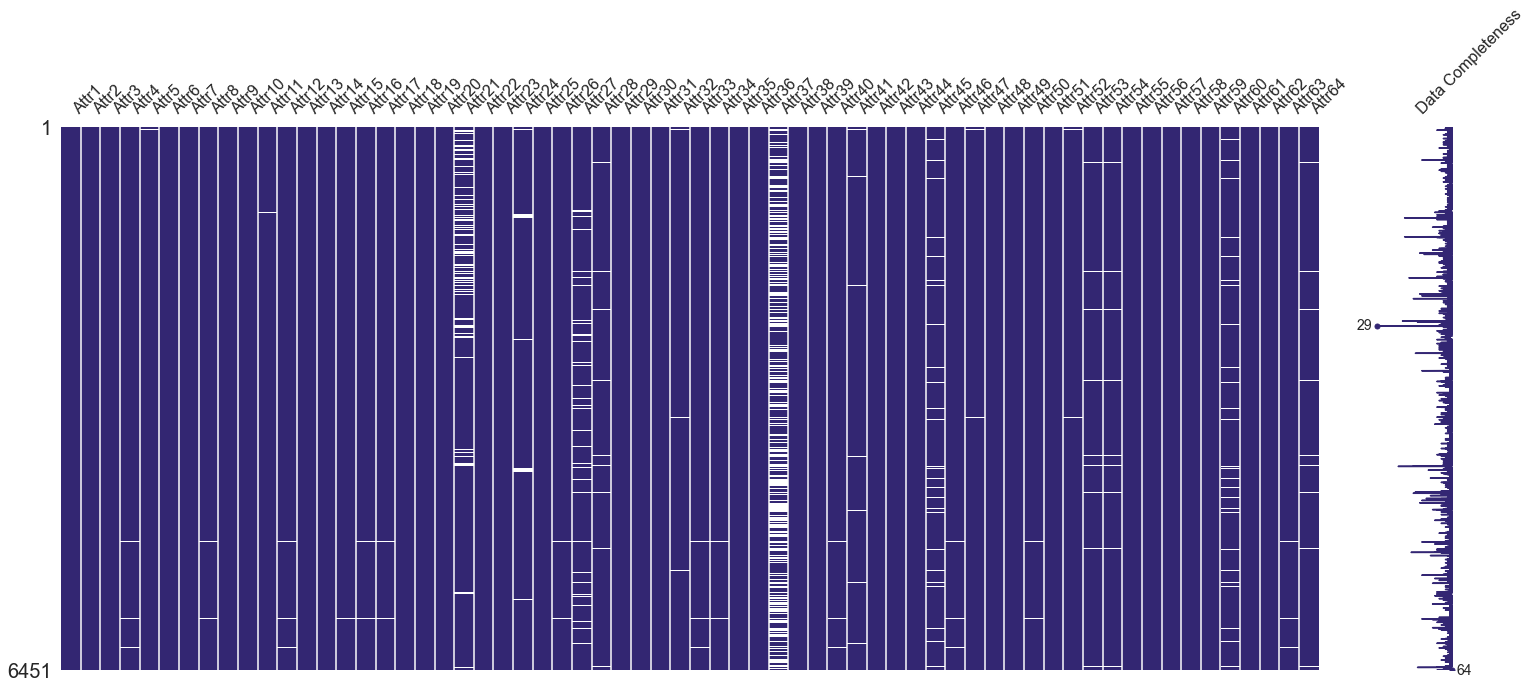

In [92]:
# Plotting NA values
plt.figure(figsize=(16,6))
msno.matrix(X_test_df, labels = True, color=(0.20,0.15,0.45))

#### Imputation

In [93]:
X_test_df.isnull().sum().sum() #Checking total number of missing values

5850

In [94]:
X_test_df = X_test_df.replace({0:np.nan}) #Replacing 0 with NA values

In [95]:
X_test_df.isnull().sum().sum() # This shows previous missing values and the new Zeros added

14350

In [96]:
X_test_df = X_test_df.fillna(X_df.median()) # Imputing Null values with train set Median

In [97]:
X_test_df.isnull().sum().sum()

2391

In [98]:
# The values that are null are in the columns which we are going to drop to match the number dimensions 
# of the training set

<AxesSubplot:>

<Figure size 1152x432 with 0 Axes>

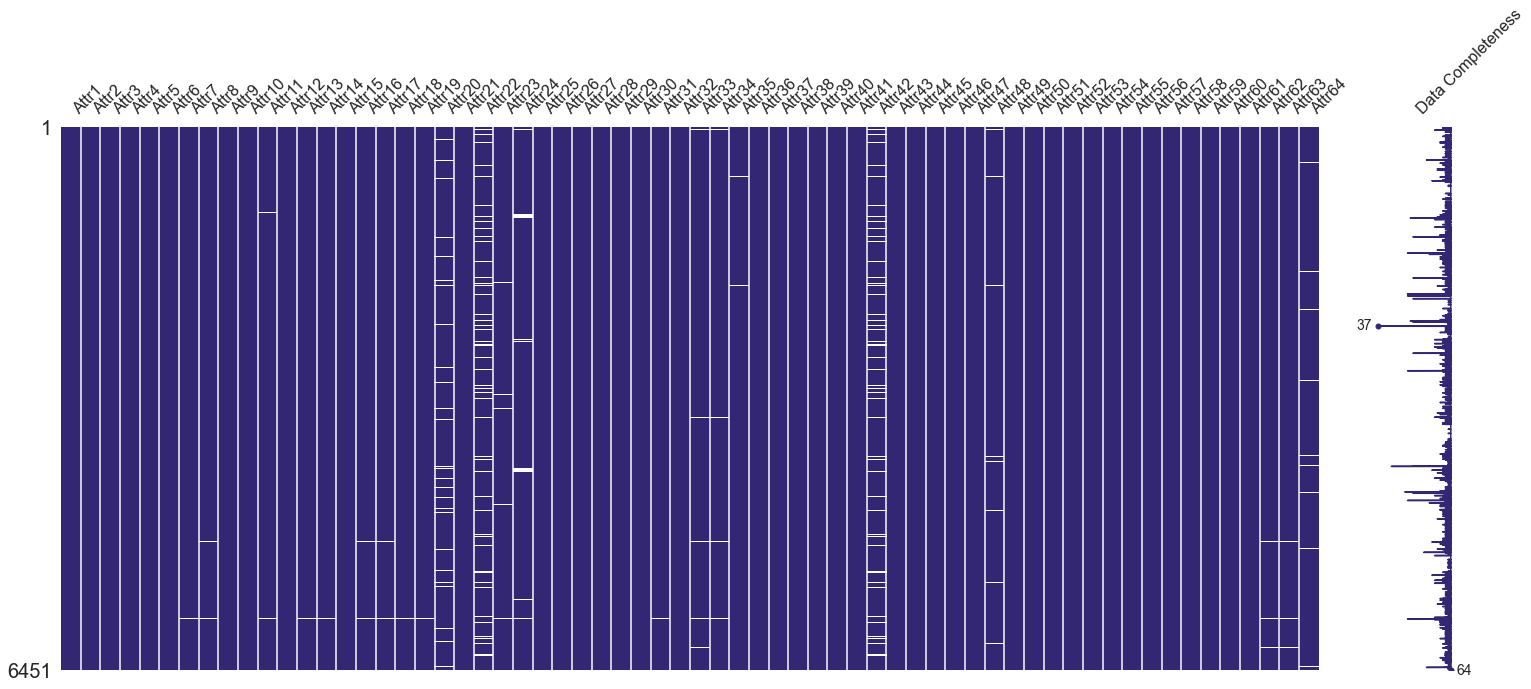

In [99]:
#Rechecking missing values after Imputation
plt.figure(figsize=(16,6))
msno.matrix(X_test_df, labels = True, color=(0.20,0.15,0.45))

#### Dropping columns to bring test data in same dimension to train model. We will use the same cols_to_be_dropped list which has irrelevant columns

In [101]:
print (cols_to_be_dropped)

['Attr38', 'Attr10', 'Attr36', 'Attr9', 'Attr11', 'Attr24', 'Attr22', 'Attr64', 'Attr18', 'Attr48', 'Attr7', 'Attr35', 'Attr34', 'Attr14', 'Attr63', 'Attr33', 'Attr42', 'Attr58', 'Attr44', 'Attr20', 'Attr43', 'Attr13', 'Attr25', 'Attr8', 'Attr31', 'Attr17', 'Attr23', 'Attr19', 'Attr62', 'Attr16', 'Attr30']


In [102]:
X_test_df.drop(cols_to_be_dropped, axis = 1 , inplace = True)

In [103]:
X_test_df.isnull().sum().sum()

0

In [104]:
X_test = X_test_df.values

In [105]:
print (X_test.shape)

(6451, 33)


In [107]:

Y_test_pred = clf_post_tune.predict(X_test)

In [118]:
Y_test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Writing result to CSV file

In [108]:
test_result = pd.DataFrame(Y_test_pred, index = X_test_df.index, columns = ['prediction'])

In [112]:
test_result.head(5)

,prediction
ID,
36554,0
36555,0
36556,0
36557,0
36558,0


In [109]:
test_result.to_csv('test_Result_XGB.csv', sep=',')

In [110]:
# f1 accuracy on test set was 64.71%
# Precision Score was 85.94%
# Recall Score was 51.89%